#API


Application Programming Interface


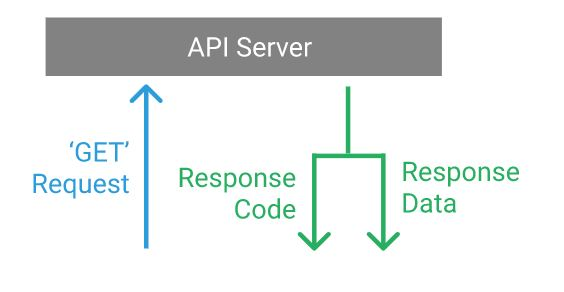

Why use an API instead of a static CSV dataset you can download from the web? 
APIs are useful in the following cases:

1. The data is changing quickly. An example of this is stock price data. It doesn’t really make sense to regenerate a dataset and download it every minute — this will take a lot of bandwidth, and be pretty slow.
2. You want a small piece of a much larger set of data. Reddit comments are one example. What if you want to just pull your own comments on Reddit? It doesn’t make much sense to download the entire Reddit database, then filter just your own comments.
3. There is repeated computation involved. Spotify has an API that can tell you the genre of a piece of music. You could theoretically create your own classifier, and use it to compute music categories, but you’ll never have as much data as Spotify does.

#API Status Codes


*   200: Everything went okay, and the result has been returned (if any).
*   301: The server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
*   400: The server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.
*   401: The server thinks you’re not authenticated. Many APIs require login ccredentials, so this happens when you don’t send the right credentials to access an API.
*   403: The resource you’re trying to access is forbidden: you don’t have the right perlessons to see it.
*   404: The resource you tried to access wasn’t found on the server.
*   503: The server is not ready to handle the request.















In [ ]:
import requests

In [ ]:
rs = requests.get("http://api.open-notify.org/astros.json")

In [ ]:
print(rs.status_code)

200


In [ ]:
print(rs.json()['people'])

[{'craft': 'ISS', 'name': 'Sergey Prokopyev'}, {'craft': 'ISS', 'name': 'Dmitry Petelin'}, {'craft': 'ISS', 'name': 'Frank Rubio'}, {'craft': 'Shenzhou 15', 'name': 'Fei Junlong'}, {'craft': 'Shenzhou 15', 'name': 'Deng Qingming'}, {'craft': 'Shenzhou 15', 'name': 'Zhang Lu'}, {'craft': 'ISS', 'name': 'Stephen Bowen'}, {'craft': 'ISS', 'name': 'Warren Hoburg'}, {'craft': 'ISS', 'name': 'Sultan Alneyadi'}, {'craft': 'ISS', 'name': 'Andrey Fedyaev'}]


#CoinMarketCap


Document:
https://coinmarketcap.com/api/documentation/v1/

In [ ]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/map'

In [ ]:
api_key = 'd1b1a69c-a5b3-443d-868e-e0bbcc7f5b0c'

In [ ]:
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': api_key,
}

In [ ]:
r = requests.get(url, headers=headers)

In [ ]:
r.status_code

200

In [ ]:
print(r.json())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(r.json()['data'][0])

{'id': 1, 'rank': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'is_active': 1, 'first_historical_data': '2013-04-28T18:47:21.000Z', 'last_historical_data': '2023-03-24T07:19:00.000Z', 'platform': None}


#Class Object

In [ ]:
from requests import session

In [ ]:
class CMC:
  def __init__(self,token):
    self.token = token
    self.apiurl = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/map'
    self.headers = {'Accepts': 'application/json','X-CMC_PRO_API_KEY': self.token,}
    self.session = session()
    self.session.headers.update(self.headers)

#Step1

  def getAllCoin(self):
    r = self.session.get(self.apiurl)
    data = r.json()['data'][:3]
    return data

#Step3

  def getPrice(self, symbol):
        url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
        parameters = {'symbol': symbol}
        r = self.session.get(url, params=parameters)
        data = r.json()
        return data


In [ ]:
cmc = CMC(api_key)

In [ ]:
cmc.getAllCoin()

[{'id': 1,
  'rank': 1,
  'name': 'Bitcoin',
  'symbol': 'BTC',
  'slug': 'bitcoin',
  'is_active': 1,
  'first_historical_data': '2013-04-28T18:47:21.000Z',
  'last_historical_data': '2023-03-24T07:19:00.000Z',
  'platform': None},
 {'id': 2,
  'rank': 13,
  'name': 'Litecoin',
  'symbol': 'LTC',
  'slug': 'litecoin',
  'is_active': 1,
  'first_historical_data': '2013-04-28T18:47:22.000Z',
  'last_historical_data': '2023-03-24T07:19:00.000Z',
  'platform': None},
 {'id': 3,
  'rank': 638,
  'name': 'Namecoin',
  'symbol': 'NMC',
  'slug': 'namecoin',
  'is_active': 1,
  'first_historical_data': '2013-04-28T18:47:22.000Z',
  'last_historical_data': '2023-03-24T07:19:00.000Z',
  'platform': None}]

In [ ]:
data = cmc.getPrice('FTM')
# 'status' :{'timestamp'}
# 'data' : {'symbol',}

In [ ]:
data

{'status': {'timestamp': '2023-03-24T07:27:21.726Z',
  'error_code': 0,
  'error_message': None,
  'elapsed': 38,
  'credit_count': 1,
  'notice': None},
 'data': {'FTM': {'id': 3513,
   'name': 'Fantom',
   'symbol': 'FTM',
   'slug': 'fantom',
   'num_market_pairs': 434,
   'date_added': '2018-10-29T00:00:00.000Z',
   'tags': ['platform',
    'enterprise-solutions',
    'defi',
    'research',
    'scaling',
    'smart-contracts',
    'fantom-ecosystem',
    'injective-ecosystem'],
   'max_supply': 3175000000,
   'circulating_supply': 2782990683.965433,
   'total_supply': 3175000000,
   'is_active': 1,
   'platform': None,
   'cmc_rank': 43,
   'is_fiat': 0,
   'self_reported_circulating_supply': None,
   'self_reported_market_cap': None,
   'tvl_ratio': None,
   'last_updated': '2023-03-24T07:25:00.000Z',
   'quote': {'USD': {'price': 0.48291012943666783,
     'volume_24h': 335487150.5913299,
     'volume_change_24h': -33.0268,
     'percent_change_1h': 0.52957384,
     'percent_cha

In [ ]:
timestamp = data['status']['timestamp']

'2023-03-24T07:27:21.726Z'

In [ ]:
symbol = 'FTM'

In [ ]:
price = data['data'][symbol]['quote']['USD']['price']

In [ ]:
print(price)

0.48291012943666783


In [ ]:
hurl = 'https://pro-api.coinmarketcap.com/v2/cryptocurrency/quotes/historical'

In [ ]:
hheaders = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': api_key,
  'time_start' : '2023-01-01T23:59:00.000Z' ,
  'interval' : 'monthly',
  }

In [ ]:
rsp = requests.get(hurl,headers=hheaders)

In [ ]:
rsp.status_code

403